# Adversarial Search: Playing Dots and Boxes


## Instructions

Total Points: Undegraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play the game Dots and Boxes:

> "Dots and Boxes is a pencil-and-paper game for two players. The game starts with an empty grid of dots. Usually two players take turns adding a single horizontal or vertical line between two unjoined adjacent dots. A player who completes the fourth side of a 1x1 box earns one point and takes another turn. A point is typically recorded by placing a mark that identifies the player in the box, such as an initial. The game ends when no more lines can be placed. The winner is the player with the most points. The board may be of any size grid." (see [Dots and Boxes on Wikipedia](https://en.wikipedia.org/wiki/Dots_and_Boxes))

You can play Dots and Boxes [here](https://www.math.ucla.edu/~tom/Games/dots&boxes.html).

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem associated with this game:

* Initial state
* Actions
* Transition model
* Test for the terminal state
* Utility for terminal states

### Initial State
The initial state is an n x n grid of dots with no lines connecting any of the boxes.
### Actions
Search North/South/East/West, Draw line North/South/East/West (Complete box and write initials MAYBE)
### Transition model
Action draw changes unconnected space to connected. Actions: NSEW shifts the agent's search in the direction of the action
### Test for the terminal state
All the dots are connected to all adjacent boxes to themselves. This results in every possible box being formed and each box is owned by one of the players.
### Utility for terminal states
The highest utility is to have all the boxes owned. However, boxes can be sacrificed to the opponent, throughout the game, in order to have more boxes than the opponent at the terminal state.


How big is the state space? Give an estimate and explain it.

### Size of state space
#### Assume that the dimensions of the dots on board are n x n

* There are n dots on each side of the board meaning there are $n^2$ dots on the board.
* There are n(n-1) vertical lines and n(n-1) horizontal lines meaning there are 2n(n-1) or $2n^{2}-2n$ possible lines that can be created
* Each line can be drawn or undrawn meaning there are $2^{2n^{2}-2n}$ possible boards that can be created from just the lines
* There can be n-1 boxes formed on each edge, meaning there are $(n-1)^2$ possible boxes to be formed on the board
* Each box that can be formed can have either opponent's initials inside it or it can be empty, meaning there are $3^{(n-1)^2}$ possible combinations created from the boxes
* Taking both calculations into consideration there are $2^{2n^{2}-2n}*3^{(n-1)^2}$ possible combinations in the board.
* However, there are boards included in this estimation that are not possible within the logic of the dots and boxes game. For example, this estimation assumes that every line can be drawn and each box is empty which in not possible in this game. This means that the size of the state space is smaller than the equation given.



How big is the game tree that minimax search will go through? Give an estimate and explain it.

${2n^{2}-2n}*3^{(n-1)^2}^{{2n^{2}-2n}*3^{(n-1)^2}}$

## Task 2: Game Environment and Random Agent [30 point]

You need to think about a data structure to represent the board meaning he placed lines and who finished what box. There are many options. Let's represent the board using a simple dictionary where `n` and `m` represents the number of dots horizontaly and vertically, respectively. Everybody needs to use the same representation so we can let agents play against each other later. 

In [497]:
#board[2] = x-coordinate
#board[1] = y-coordinate
#board[0] = direction


board = {
    'n': 4,  ### hoizontal dots
    'm': 4,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}


def draw_line(board, orientation, row, col, turn, verbose = False):
    """
    Place a line on an exiting board.
       
    Parameters
    ----------
    board: dict
        the board
    orientation: str
        either 'h' or 'v' for horizontal or vertical
    row, col: int
        index of the starting dot for the line (starting with 0)
    turn: int
        either 1 or -1 to determine the current player

    """
    another_turn = False
    # print(f"m: {board['m']}, n: {board['n']}, Row: {row}, Col: {col}, Orientation: {orientation}")

    if orientation not in ['h', 'v']:
        return False
        
    if row < 0 or col < 0:
        return False

    if row > board['m'] + (orientation == 'v') or col > board['n'] + (orientation == 'h'):
        return False
        
    if (orientation, row, col) in board:
        return False
            
    board[(orientation, row, col)] = True
    if verbose: print(f"{orientation}, {row}, {col}")

    # Check for new Boxes
    if orientation == 'v':
        # Check if box to the Left
        if ('v', row, col-1) in board and ('h', row, col-1) in board and ('h', row+1, col-1) in board:
            another_turn = True
            board[row+1,col-1] = turn
            if turn == 1:
                # print(f"-----1-----")
                board[1] += 1
            else:
                # print(f"-----2-----")
                board[-1] += 1

        # Check if box to the Right
        if ('h', row, col) in board and ('h', row+1, col) in board and ('v', row, col+1) in board:
            another_turn = True
            board[row+1,col] = turn
            if turn == 1:
                # print(f"-----3-----")
                board[1] += 1
            else:
                # print(f"-----4-----")
                board[-1] += 1

    if orientation == 'h':
        # Check if box Above
        if ('v', row, col) in board and ('h', row+1, col) in board and ('v', row, col+1) in board:
            another_turn = True
            board[row+1,col] = turn
            if turn == 1:
                # print(f"-----5-----")
                board[1] += 1
            else:
                # print(f"-----6-----")
                board[-1] += 1

        # Check if box Below
        if ('v', row-1, col) in board and ('h', row-1, col) in board and ('v', row-1, col+1) in board:
            another_turn = True
            board[row,col] = turn
            if turn == 1:
                # print(f"-----7-----")
                board[1] += 1
            else:
                # print(f"-----8-----")
                board[-1] += 1

    return (True, another_turn)
    

print(draw_line(board, "h", 1, 1,1))
print(draw_line(board, "v", 1, 1,-1))

# this should not work
print(draw_line(board, "h", 1, 1,1))

board

(True, False)
(True, False)
False


{'n': 4, 'm': 4, 1: 0, -1: 0, ('h', 1, 1): True, ('v', 1, 1): True}

Write code to display the board. **Bonus point: Post your visualization code with an example output to the discussion board. The best visualization will earn you bonus participation points in this class.**

Results:
         -1: 2
          1: 2


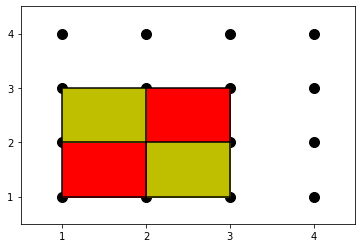

In [620]:
# This code was taken from the discussion board with slight modification
# Credit goes to Diogo Benetti Fae Rodrigues

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def print_board(board, verbose = False):
    n = board['n']  # Rows
    m = board['m']  # Columns

    fig, ax = plt.subplots()
    ax.set_xlim(-0.5, m-0.5)
    ax.set_ylim(-0.5, n-0.5)

    # Draw dots
    for row in range(n):
        for col in range(m):
            if (row, col) in board:
                ax.scatter(row, col, s=100, marker='o', color='black')
            else:
                ax.scatter(row, col, s=100, marker='o', color='black')

    # Draw lines
    for line in board:
        # print(line)
        if line != -1 and line != 1:
            # if verbose: print(line)
            # if verbose: print(f"Length: {len(line)}")
            if len(line) > 2:
                # Draw Horizontal line
                if line[0] == 'h':
                    l = mlines.Line2D([line[2]-1,line[2]], [line[1]-1,line[1]-1], color='black')
                    # l = mlines.Line2D([line[1],line[1]], [line[2],line[2]+1], color='black')
                    ax.add_line(l)
                # Draw Vertical line
                else:
                    l = mlines.Line2D([line[2]-1,line[2]-1], [line[1]-1,line[1]], color='black')
                    # l = mlines.Line2D([line[1],line[1]-1], [line[2],line[2]], color='black')
                    ax.add_line(l)

    # Check for boxes
    # Boxes are stored in board with (row, col) as key and player (1 or -1) as value
    # eg: board[(3, 1)] = 1 -> player 1 has a box with top left vertex at (3, 1)
    for box in board:
        # if verbose: print(box)
        if box != -1 and box != 1:
            # if verbose: print(box)
            if len(box) == 2:
                # if verbose: print(box)
                if board[(box[0], box[1])] == 1:
                    ax.add_patch(plt.Rectangle((box[1]-1, box[0]-2), 1, 1, color='r'))
                else:
                    ax.add_patch(plt.Rectangle((box[1]-1, box[0]-2), 1, 1, color='y'))

    # Print results
    print('Results:')
    print('         -1:', board[-1])
    print('          1:', board[1])

    # Set up plot to start at (1, 1)
    x = []
    y = []
    for row in range(board['n']):
        # x.append(row)
        x.append(row+1)
    for col in range(board['m']):
        # y.append(col)
        y.append(col+1)
    default_x_ticks = range(len(x))
    plt.xticks(default_x_ticks, x)
    default_y_ticks = range(len(y))
    plt.yticks(default_y_ticks, y)

    plt.show()

myboard = {
    'n': 4,  ### hoizontal dots
    'm': 4,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}


draw_line(myboard, "v", 1, 1,1)
draw_line(myboard, "v", 2, 1,-1)
draw_line(myboard, "v", 1, 2,1)
draw_line(myboard, "v", 2, 3,-1)

draw_line(myboard, "h", 1, 2,1)
draw_line(myboard, "h", 2, 1,-1)
draw_line(myboard, "h", 2, 2,1)
draw_line(myboard, "h", 3, 2,-1)

draw_line(myboard, "v", 2, 2,1)
draw_line(myboard, "v", 1, 3,-1)
draw_line(myboard, "h", 1, 1,1)
draw_line(myboard, "h", 3, 1,-1)

print_board(myboard, True)

Implement helper functions for:

* The transition model $result(s, a)$.
* The utility function $utility(s)$.
* Check for terminal states $terminal(s)$.
* A check for available actions in each state $actions(s)$.

Make sure that all these functions work with boards of different sizes (number of columns and rows as stored in the board).

In [499]:
# A check for available actions in each state actions(s)
def actions(s, verbose = False):
    n = s['n']  # Rows
    m = s['m']  # Columns
    actions_remaining = []
    if verbose: print_board(s)
    for row in range(n):
        for col in range(m):
            if ('v', row+1, col+1) not in s and row != n-1:
                actions_remaining.append(('v', row+1, col+1))
            if ('h', row+1, col+1) not in s and col != m-1:
                actions_remaining.append(('h', row+1, col+1))
                # print(actions_remaining)
    return actions_remaining

def terminal(s):
    if len(actions(s)) == 0: return True
    else: return False

def result(s, a, player):
    temp_s = s.copy()
    draw_res = draw_line(temp_s, a[0], a[1], a[2], player)
    if draw_res[0] is True:
        return temp_s, draw_res[1]
    else:
        print("This is not a valid move!")

def winner(s):
    if s[1] > s[-1]:
        return 1
    elif s[-1] > s[1]:
        return -1
    else:
        return 0

def utility(s, player, verbose = False):
    if terminal(s) is True:
        if player == winner(s):
            return 1
        elif winner(s) == 0:
            return 0
        else:
            return -1
    else:
        if verbose: print("Game is not over!")
        return None

print("--------------------ACTIONS--------------------")
print(actions(myboard))
print("--------------------terminal--------------------")
print(terminal(myboard))
print("--------------------result--------------------")
result_state, another_turn = result(myboard, ['h', 1, 3], 1)
print(result_state, another_turn)
print("--------------------utility--------------------")
print(utility(myboard, 1))

--------------------ACTIONS--------------------
[('h', 1, 3), ('v', 1, 4), ('h', 2, 3), ('v', 2, 4), ('v', 3, 1), ('v', 3, 2), ('v', 3, 3), ('h', 3, 3), ('v', 3, 4), ('h', 4, 1), ('h', 4, 2), ('h', 4, 3)]
--------------------terminal--------------------
False
--------------------result--------------------
{'n': 4, 'm': 4, 1: 2, -1: 2, ('v', 1, 1): True, ('v', 2, 1): True, ('v', 1, 2): True, ('v', 2, 3): True, ('h', 1, 2): True, ('h', 2, 1): True, ('h', 2, 2): True, ('h', 3, 2): True, ('v', 2, 2): True, (3, 2): 1, ('v', 1, 3): True, (2, 2): -1, ('h', 1, 1): True, (2, 1): 1, ('h', 3, 1): True, (3, 1): -1, ('h', 1, 3): True} False
--------------------utility--------------------
None


Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = None): ...`

The argument `player` is used for agents that do not store what side they are playing. The value passed on by the environment should be 1 or -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [500]:
import random
def random_player(board, player = None):
     action_options = actions(board).copy() #might not be needed
     a = random.choice(action_options)
     drawn, another_turn = draw_line(board, a[0], a[1], a[2], player)
     return another_turn

random_player(myboard, 1)

False

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

Each player should win 50% of the time.

The result that I got was expected because it is only 513 vs 487 meaning only 13 out of the 1000 games should have gone to player 2 to make it a %50 vs. %50 win ratio.


In [501]:
random_board = {
    'n': 4,  ### hoizontal dots
    'm': 4,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}

def random_environment(board, verbose = False):
    player1_total = 0
    player2_total = 0

    for x in range(1000):
        temp_board = board.copy()
        player = 1
        while terminal(temp_board) is False:
            if not random_player(temp_board, player):
                if player == 1:
                    player = -1
                else:
                    player = 1
            if verbose: print_board(temp_board)

        if winner(temp_board) == 1:
            player1_total += 1
        elif winner(temp_board) == -1:
            player2_total += 1

    if player1_total > player2_total:
        print(f"Player 1 Wins!")
    elif player2_total > player1_total:
        print(f"Player 2 Wins!")
    else:
        print(f"Player 1 and Player 2 Tide!")
    print(f"Player 1: {player1_total} Player 2: {player2_total}")


random_environment(random_board)


Player 2 Wins!
Player 1: 495 Player 2: 505


## Task 3: Minimax Search with Alpha-Beta Pruning [30 points]


Implement the search starting from a given board and specifying the player and put it into an agent function.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Notes:__ 
* Make sure that all your agent functions have a signature consistent with the random agent above.
* The search space for larger board may be too large. You can experiment with smaller boards.




Results:
         -1: 0
          1: 0


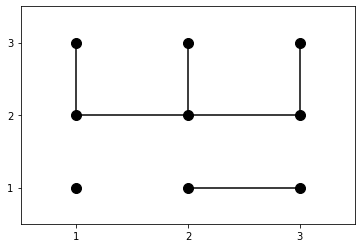

(1, ('h', 3, 1))

In [623]:
count = 0

minimax_board = {
    'n': 3,  ### hoizontal dots
    'm': 3,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}

draw_line(minimax_board, "v", 2, 1,-1)
draw_line(minimax_board, "v", 2, 2,1)
draw_line(minimax_board, "v", 2, 3,-1)
draw_line(minimax_board, "h", 1, 2,1)
draw_line(minimax_board, "h", 2, 1,-1)
draw_line(minimax_board, "h", 2, 2,1)

def other(player):
    if player == 1: return -1
    else: return 1

def minimax_alpha_beta_search(state, player = 1, verbose = False):
    global count
    count = 0

    if verbose: print_board(state)
    value, move = max_value(state, player, -math.inf, +math.inf, verbose)
    if verbose: print(f"Number of nodes searched: {count}")

    return (value, move)

def max_value(state, player, alpha, beta, verbose = False):
    #player 1's best move.
    global count
    count += 1

    # return utility of state if it is a terminal state
    v = utility(state, player)
    if verbose: print(f"max: {state} [alpha,beta]=[{alpha},{beta}] v={v}")
    if v is not None: return v, None

    v, move = -math.inf, None

    # check all possible actions in the state, return move with the largest value
    for a in actions(state):
        if verbose: print(a)
        new_state, another_turn = result(state, a, player)
        if another_turn:
            v2, a2 = max_value(new_state, player, alpha, beta, verbose)
        else:
            v2, a2 = min_value(new_state, player, alpha, beta, verbose)
        if verbose: print(f"max: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")
        if v2 > v:
            v, move = v2, a
            alpha = max(alpha, v)
        if v >= beta:
            if verbose: print(f"     v>=beta ({v}>={beta}): pruning remaining subtree (actions). backtracking.")
            return v, move

    if verbose: print("max out:  + str(state)" + str([v, move]) )
    return v, move

def min_value(state, player, alpha, beta, verbose = False):
    """opponent's best response."""
    global count
    count += 1

    # return utility of state if it is a terminal state
    v = utility(state, player)
    if verbose: print(f"min: {state} [alpha,beta]=[{alpha},{beta}] v={v}")
    if v is not None: return v, None

    v, move = +math.inf, None

    # check all possible actions in the state, return move with the smallest value
    for a in actions(state):
        if verbose: print(a)
        new_state, another_turn = result(state, a, other(player))
        if another_turn:
            v2, a2 = min_value(new_state, player, alpha, beta, verbose)
        else:
            v2, a2 = max_value(new_state, player, alpha, beta, verbose)
        # v2, a2 = max_value(result(state, a, other(player)), player, alpha, beta, verbose)
        if verbose: print(f"min: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")
        if v2 < v:
            v, move = v2, a
            beta = min(beta, v)
        if v <= alpha:
            if verbose: print(f"     v<=alpha ({v}<={alpha}): pruning remaining subtree (actions). backtracking.")
            return v, move

    if verbose: print("min out: + str(state)" + str([v, move]) )
    return v, move

print_board(minimax_board)
minimax_alpha_beta_search(minimax_board, 1)

Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

(1, ('h', 3, 2))
Results:
         -1: 0
          1: 3


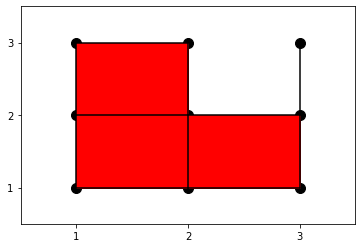

(1, ('h', 3, 1))
Results:
         -1: 0
          1: 0


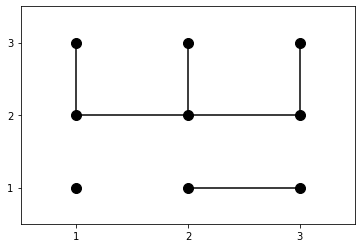

(0, ('h', 3, 2))
Results:
         -1: 0
          1: 0


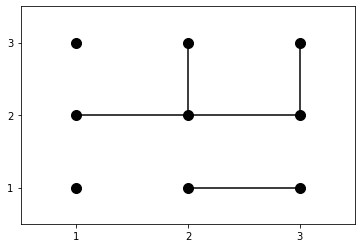

(1, ('h', 4, 2))
Results:
         -1: 3
          1: 3


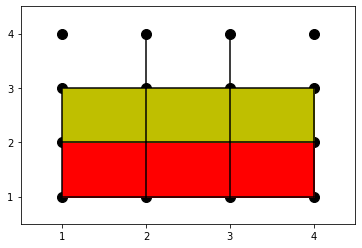

(1, ('h', 1, 2))
Results:
         -1: 3
          1: 3


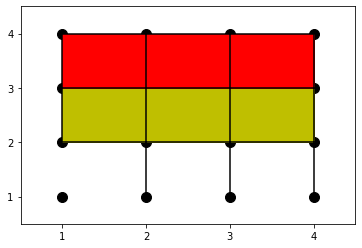

In [503]:
# --------------- Board 1 ---------------
test_board_1 = {
    'n': 3,  ### hoizontal dots
    'm': 3,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}

draw_line(test_board_1, "v", 1, 1,1)
draw_line(test_board_1, "v", 1, 2,1)
draw_line(test_board_1, "v", 1, 3,1)
draw_line(test_board_1, "v", 2, 1,1)
draw_line(test_board_1, "v", 2, 2,1)
draw_line(test_board_1, "v", 2, 3,1)

draw_line(test_board_1, "h", 1, 1,1)
draw_line(test_board_1, "h", 1, 2,1)
draw_line(test_board_1, "h", 2, 1,1)
draw_line(test_board_1, "h", 2, 2,1)
draw_line(test_board_1, "h", 3, 1,1)

print(minimax_alpha_beta_search(test_board_1, 1))
print_board(test_board_1)

# --------------- Board 2 ---------------
test_board_2 = {
    'n': 3,  ### hoizontal dots
    'm': 3,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}
draw_line(test_board_2, "v", 2, 1,1)
draw_line(test_board_2, "v", 2, 2,1)
draw_line(test_board_2, "v", 2, 3,1)

draw_line(test_board_2, "h", 1, 2,1)
draw_line(test_board_2, "h", 2, 1,1)
draw_line(test_board_2, "h", 2, 2,1)

print(minimax_alpha_beta_search(test_board_2, 1))
print_board(test_board_2)

# --------------- Board 3 ---------------
test_board_3 = {
    'n': 3,  ### hoizontal dots
    'm': 3,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}

draw_line(test_board_3, "v", 2, 2,1)
draw_line(test_board_3, "v", 2, 3,1)

draw_line(test_board_3, "h", 1, 2,1)
draw_line(test_board_3, "h", 2, 1,1)
draw_line(test_board_3, "h", 2, 2,1)

print(minimax_alpha_beta_search(test_board_3, 1))
print_board(test_board_3)

# --------------- Board 4 ---------------
test_board_4 = {
    'n': 4,  ### hoizontal dots
    'm': 4,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}

draw_line(test_board_4, "v", 1, 1,1)
draw_line(test_board_4, "v", 1, 2,1)
draw_line(test_board_4, "v", 1, 3,1)
draw_line(test_board_4, "v", 1, 4,1)
draw_line(test_board_4, "v", 2, 1,1)
draw_line(test_board_4, "v", 2, 2,1)
draw_line(test_board_4, "v", 2, 3,1)
draw_line(test_board_4, "v", 2, 4,1)
draw_line(test_board_4, "v", 3, 2,1)
draw_line(test_board_4, "v", 3, 3,1)

draw_line(test_board_4, "h", 1, 1,1)
draw_line(test_board_4, "h", 1, 2,1)
draw_line(test_board_4, "h", 1, 3,1)
draw_line(test_board_4, "h", 2, 1,1)
draw_line(test_board_4, "h", 2, 2,1)
draw_line(test_board_4, "h", 2, 3,1)
draw_line(test_board_4, "h", 3, 1,-1)
draw_line(test_board_4, "h", 3, 2,-1)
draw_line(test_board_4, "h", 3, 3,-1)


print(minimax_alpha_beta_search(test_board_4, 1))
print_board(test_board_4)


# --------------- Board 5 ---------------
test_board_5 = {
    'n': 4,  ### hoizontal dots
    'm': 4,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}

draw_line(test_board_5, "v", 1, 2,1)
draw_line(test_board_5, "v", 1, 3,1)
draw_line(test_board_5, "v", 1, 4,1)
draw_line(test_board_5, "v", 2, 1,1)
draw_line(test_board_5, "v", 2, 2,1)
draw_line(test_board_5, "v", 2, 3,1)
draw_line(test_board_5, "v", 2, 4,1)
draw_line(test_board_5, "v", 3, 1,1)
draw_line(test_board_5, "v", 3, 2,1)
draw_line(test_board_5, "v", 3, 3,1)
draw_line(test_board_5, "v", 3, 4,1)

draw_line(test_board_5, "h", 2, 1,1)
draw_line(test_board_5, "h", 2, 2,1)
draw_line(test_board_5, "h", 2, 3,1)
draw_line(test_board_5, "h", 3, 1,-1)
draw_line(test_board_5, "h", 3, 2,-1)
draw_line(test_board_5, "h", 3, 3,-1)
draw_line(test_board_5, "h", 4, 1,1)
draw_line(test_board_5, "h", 4, 2,1)
draw_line(test_board_5, "h", 4, 3,1)


print(minimax_alpha_beta_search(test_board_5, 1))
print_board(test_board_5)

How long does it take to make a move? Start with a smaller board make the board larger. What is the largest board you can solve?

In [555]:
import timeit

time_board_2x2 = {
    'n': 2,  ### hoizontal dots
    'm': 2,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}

time_board_3x3 = {
    'n': 3,  ### hoizontal dots
    'm': 3,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}


start_time = timeit.default_timer()
minimax_alpha_beta_search(time_board_2x2, 1,)
end_time = timeit.default_timer()
print(f"board with size 2x2 took: {(end_time-start_time)/10 * 1e3} milliseconds")

start_time = timeit.default_timer()
minimax_alpha_beta_search(time_board_3x3, 1,)
end_time = timeit.default_timer()
print(f"board with size 3x3 took: {(end_time-start_time)/10 * 1e3} milliseconds")

board with size 2x2 took: 0.040469999657943845 milliseconds
board with size 3x3 took: 487.4694099999033 milliseconds


The 4x4 grid ran for too long so I cancelled it because it basically wouldn't run

### Move ordering

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

Results:
         -1: 0
          1: 0


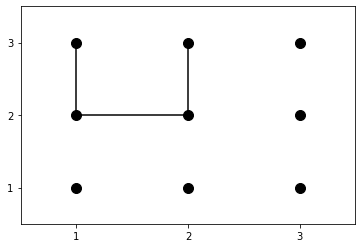

Results:
         -1: 0
          1: 0


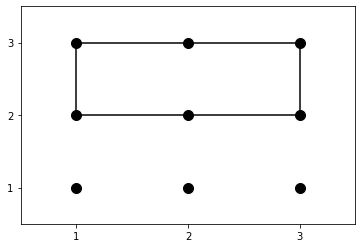

Results:
         -1: 3
          1: 0


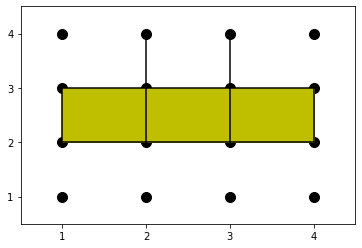

test_board_1_mo WITHOUT Move ordering: 47.496709995903075 milliseconds
test_board_2_mo WITHOUT Move ordering: 0.7416700012981892 milliseconds
test_board_3_mo WITHOUT Move ordering: 3514.1691499971785 milliseconds
test_board_1_mo WITH Move ordering: 6.2484399997629225 milliseconds
test_board_2_mo WITH Move ordering: 0.36066999891772866 milliseconds
test_board_3_mo WITH Move ordering: 51.126110000768676 milliseconds


In [575]:
import math
count = 0

minimax_board_MO = {
    'n': 3,  ### hoizontal dots
    'm': 3,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}

draw_line(minimax_board_MO, "v", 2, 1,-1)
draw_line(minimax_board_MO, "v", 2, 2,1)
draw_line(minimax_board_MO, "v", 2, 3,-1)
draw_line(minimax_board_MO, "h", 1, 2,1)
draw_line(minimax_board_MO, "h", 2, 1,-1)
draw_line(minimax_board_MO, "h", 2, 2,1)

def is_box(board, orientation, row, col, verbose = False):
    # Check for new Boxes
    boxes = 0
    if orientation == 'v':
        # Check if box to the Left
        if ('v', row, col-1) in board and ('h', row, col-1) in board and ('h', row+1, col-1) in board:
            boxes += 1
        # Check if box to the Right
        if ('h', row, col) in board and ('h', row+1, col) in board and ('v', row, col+1) in board:
            boxes += 1
    if orientation == 'h':
        # Check if box Above
        if ('v', row, col) in board and ('h', row+1, col) in board and ('v', row, col+1) in board:
            boxes += 1
        # Check if box Below
        if ('v', row-1, col) in board and ('h', row-1, col) in board and ('v', row-1, col+1) in board:
            boxes += 1
    return boxes

def move_ordering(s, verbose = False):
    no_box = []
    one_box = []
    two_boxes = []
    available_actions = actions(s)
    for a in available_actions:
        box_num = is_box(s, a[0], a[1], a[2])
        if box_num == 2:
            two_boxes.append(a)
        if box_num == 1:
            one_box.append(a)
        else:
            no_box.append(a)
    two_boxes.extend(one_box)
    two_boxes.extend(no_box)
    return two_boxes

def minimax_alpha_beta_search_MO(state, player = 1, verbose = False):
    global count
    count = 0

    value, move = max_value_MO(state, player, -math.inf, +math.inf, verbose)
    if verbose: print(f"Number of nodes searched: {count}")

    return (value, move)

def max_value_MO(state, player, alpha, beta, verbose = False):
    #player 1's best move.
    global count
    count += 1

    # return utility of state if it is a terminal state
    v = utility(state, player)
    if verbose: print(f"max: {state} [alpha,beta]=[{alpha},{beta}] v={v}")
    if v is not None: return v, None

    v, move = -math.inf, None

    # check all possible actions in the state, return move with the largest value
    for a in move_ordering(state):
        if verbose: print(a)
        new_state, another_turn = result(state, a, player)
        if another_turn:
            v2, a2 = max_value_MO(new_state, player, alpha, beta, verbose)
        else:
            v2, a2 = min_value_MO(new_state, player, alpha, beta, verbose)
        if verbose: print(f"max: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")
        if v2 > v:
            v, move = v2, a
            alpha = max(alpha, v)
        if v >= beta:
            if verbose: print(f"     v>=beta ({v}>={beta}): pruning remaining subtree (actions). backtracking.")
            return v, move

    if verbose: print("max out:  + str(state)" + str([v, move]) )
    return v, move

def min_value_MO(state, player, alpha, beta, verbose = False):
    """opponent's best response."""
    global count
    count += 1

    # return utility of state if it is a terminal state
    v = utility(state, player)
    if verbose: print(f"min: {state} [alpha,beta]=[{alpha},{beta}] v={v}")
    if v is not None: return v, None

    v, move = +math.inf, None

    # check all possible actions in the state, return move with the smallest value
    for a in move_ordering(state):
        if verbose: print(a)
        new_state, another_turn = result(state, a, other(player))
        if another_turn:
            v2, a2 = min_value_MO(new_state, player, alpha, beta, verbose)
        else:
            v2, a2 = max_value_MO(new_state, player, alpha, beta, verbose)
        # v2, a2 = max_value(result(state, a, other(player)), player, alpha, beta, verbose)
        if verbose: print(f"min: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")
        if v2 < v:
            v, move = v2, a
            beta = min(beta, v)
        if v <= alpha:
            if verbose: print(f"     v<=alpha ({v}<={alpha}): pruning remaining subtree (actions). backtracking.")
            return v, move

    if verbose: print("min out: + str(state)" + str([v, move]) )
    return v, move


# --------------- Move ordering Board 1 ---------------
test_board_1_mo = {
    'n': 3,  ### hoizontal dots
    'm': 3,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}

draw_line(test_board_1_mo, "v", 2, 1,1)
draw_line(test_board_1_mo, "v", 2, 2,1)
draw_line(test_board_1_mo, "h", 2, 1,1)

print_board(test_board_1_mo)

# --------------- Move ordering Board 2 ---------------
test_board_2_mo = {
    'n': 3,  ### hoizontal dots
    'm': 3,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}

draw_line(test_board_2_mo, "v", 2, 1,1)
draw_line(test_board_2_mo, "v", 2, 3,1)
draw_line(test_board_2_mo, "h", 2, 1,1)
draw_line(test_board_2_mo, "h", 2, 2,1)
draw_line(test_board_2_mo, "h", 3, 1,1)
draw_line(test_board_2_mo, "h", 3, 2,1)

print_board(test_board_2_mo)

# --------------- Board 3 ---------------
test_board_3_mo = {
    'n': 4,  ### hoizontal dots
    'm': 4,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}

draw_line(test_board_3_mo, "v", 2, 1,1)
draw_line(test_board_3_mo, "v", 2, 2,1)
draw_line(test_board_3_mo, "v", 2, 3,1)
draw_line(test_board_3_mo, "v", 2, 4,1)
draw_line(test_board_3_mo, "v", 3, 2,1)
draw_line(test_board_3_mo, "v", 3, 3,1)
draw_line(test_board_3_mo, "h", 2, 1,1)
draw_line(test_board_3_mo, "h", 2, 2,1)
draw_line(test_board_3_mo, "h", 2, 3,1)
draw_line(test_board_3_mo, "h", 3, 1,-1)
draw_line(test_board_3_mo, "h", 3, 2,-1)
draw_line(test_board_3_mo, "h", 3, 3,-1)

print_board(test_board_3_mo)

#-------------------- WITHOUT Move ordering --------------------
start_time = timeit.default_timer()
minimax_alpha_beta_search(test_board_1_mo, 1, False)
end_time = timeit.default_timer()
print(f"test_board_1_mo WITHOUT Move ordering: {(end_time-start_time)/10 * 1e3} milliseconds")

start_time = timeit.default_timer()
minimax_alpha_beta_search(test_board_2_mo, 1, False)
end_time = timeit.default_timer()
print(f"test_board_2_mo WITHOUT Move ordering: {(end_time-start_time)/10 * 1e3} milliseconds")

start_time = timeit.default_timer()
minimax_alpha_beta_search(test_board_3_mo, 1, False)
end_time = timeit.default_timer()
print(f"test_board_3_mo WITHOUT Move ordering: {(end_time-start_time)/10 * 1e3} milliseconds")

#-------------------- WITH Move ordering --------------------
start_time = timeit.default_timer()
minimax_alpha_beta_search_MO(test_board_1_mo, 1, False)
end_time = timeit.default_timer()
print(f"test_board_1_mo WITH Move ordering: {(end_time-start_time)/10 * 1e3} milliseconds")

start_time = timeit.default_timer()
minimax_alpha_beta_search_MO(test_board_2_mo, 1, False)
end_time = timeit.default_timer()
print(f"test_board_2_mo WITH Move ordering: {(end_time-start_time)/10 * 1e3} milliseconds")

start_time = timeit.default_timer()
minimax_alpha_beta_search_MO(test_board_3_mo, 1, False)
end_time = timeit.default_timer()
print(f"test_board_3_mo WITH Move ordering: {(end_time-start_time)/10 * 1e3} milliseconds")



As you can see from the results, the move ordering makes an improvement, but the improvement, and is most effective when there are a lot of possible options like the results found testing on test_board_3_mo. Overall, the results make sense because, when move ordering is used, there are more branches that are able to be pruned when a better branch is already searched down first.


### The first few moves

Start with an empty board. This is the worst case scenario for minimax search with alpha-beta pruning since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do? 

Improvements that I would make in order to reduce the time spent in the beginning moves is I would search the board until I found a spot that did not make any U shapes (3 parts to an entire square) or a spot that was currently a U shape that could be turned into a square. There is no reason to exhaust a search of all playable moves when it is too early in the game to predict what the opponent will do next. At this point in the game, the most important objective is to make sure not to give the opponent any easy squares by creating a U for the opponent. The second most important objective at this stage of the game would be to make sure to close any U shapes into boxes in order to take easy boxes that the opponent accidentally creates. After there are no more possible spot that won't create a U, this is when the alpha_beta search should take over in order to predict the best moves with a reduced number of moves remaining.

### Playtime

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [579]:
# --------------- Minimax VS. Random ---------------
minimax_vs_random = {
    'n': 3,  ### hoizontal dots
    'm': 3,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}
def minimax_player(board, player = None):
    v, a = minimax_alpha_beta_search_MO(board, player, False)
    drawn, another_turn = draw_line(board, a[0], a[1], a[2], player)
    return another_turn

def minimax_environment(board, verbose = False):
    player1_total = 0
    player2_total = 0

    for x in range(10):
        temp_board = board.copy()
        player = 1
        while terminal(temp_board) is False:
            if player == 1:
                if not minimax_player(temp_board, player):
                    player = -1
            else:
                if not random_player(temp_board, player):
                    player = 1
            if verbose: print_board(temp_board)

        if winner(temp_board) == 1:
            player1_total += 1
        elif winner(temp_board) == -1:
            player2_total += 1

    if player1_total > player2_total:
        print(f"Player 1 Wins!")
    elif player2_total > player1_total:
        print(f"Player 2 Wins!")
    else:
        print(f"Player 1 and Player 2 Tied!")
    print(f"Player 1: {player1_total} Player 2: {player2_total}")


minimax_environment(minimax_vs_random, False)

Player 1 Wins!
Player 1: 10 Player 2: 0


## Task 4: Heuristic Alpha-Beta Tree Search [30 points] 

### Heuristic evaluation function

Define and implement a heuristic evaluation function.

In [610]:
def heuristic_value(s, player, verbose = False):
    num_of_squares = (s['n']-1) * (s['m']-1)
    other_player = other(player)
    difference = s[player] - s[other_player]
    v = difference/num_of_squares
    return v

### Cutting off search 

Modify your Minimax Search with Alpha-Beta Pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

Results:
         -1: 0
          1: 0


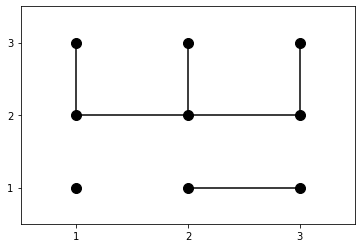

(1.0, ('h', 3, 1))

In [626]:
heuristic_board = {
    'n': 3,  ### hoizontal dots
    'm': 3,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}

draw_line(heuristic_board, "v", 2, 1,-1)
draw_line(heuristic_board, "v", 2, 2,1)
draw_line(heuristic_board, "v", 2, 3,-1)
draw_line(heuristic_board, "h", 1, 2,1)
draw_line(heuristic_board, "h", 2, 1,-1)
draw_line(heuristic_board, "h", 2, 2,1)

action_count = 0

def heuristic_search(state, player = 1, cutoff = None, verbose = False):
    global count
    count = 0

    if verbose: print_board(state)
    value, move = heuristic_max_value(state, player, -math.inf, +math.inf, 0, cutoff, verbose)
    if verbose: print(f"Number of nodes searched (cutoff = {cutoff}): {count}")

    return (value, move)

def heuristic_max_value(state, player, alpha, beta, depth, cutoff, verbose = True):
    #player 1's best move.
    global count
    global action_count
    count += 1
    # return heuristic_value of state if it is a terminal state
    v = heuristic_value(state, player)
    is_terminal = terminal(state)
    if (cutoff is not None and depth >= cutoff) or is_terminal:
        if is_terminal:
            alpha, beta = v, v
        if verbose: print(f"stopped at {depth}: {state} term: {is_terminal} eval: {v} [{alpha}, {beta}]" )
        return v, None

    v, move = -math.inf, None

    # check all possible actions in the state, return move with the largest value
    for a in move_ordering(state):
        if verbose: print(a)
        new_state, another_turn = result(state, a, player)
        if another_turn:
            v2, a2 = heuristic_max_value(new_state, player, alpha, beta, depth + 1, cutoff, verbose)
        else:
            v2, a2 = heuristic_min_value(new_state, player, alpha, beta, depth + 1, cutoff, verbose)
        action_count += 1
        if verbose: print(f"max: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")
        if v2 > v:
            v, move = v2, a
            alpha = max(alpha, v)
        if v >= beta:
            if verbose: print(f"     v>=beta ({v}>={beta}): pruning remaining subtree (actions). backtracking.")
            return v, move

    if verbose: print("max out:  + str(state)" + str([v, move]) )
    return v, move

def heuristic_min_value(state, player, alpha, beta, depth, cutoff, verbose = True):
    """opponent's best response."""
    global count
    count += 1

    # return utility of state if it is a terminal state
    v = heuristic_value(state, player)
    is_terminal = terminal(state)
    if (cutoff is not None and depth >= cutoff) or is_terminal:
        if is_terminal:
            alpha, beta = v, v
        if verbose: print(f"stopped at {depth}: {state} term: {is_terminal} eval: {v} [{alpha}, {beta}]" )
        return v, None

    v, move = +math.inf, None

    # check all possible actions in the state, return move with the smallest value
    for a in move_ordering(state):
        if verbose: print(a)
        new_state, another_turn = result(state, a, other(player))
        if another_turn:
            v2, a2 = heuristic_min_value(new_state, player, alpha, beta, depth + 1, cutoff, verbose)
        else:
            v2, a2 = heuristic_max_value(new_state, player, alpha, beta, depth + 1, cutoff, verbose)
        if verbose: print(f"min: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")
        if v2 < v:
            v, move = v2, a
            beta = min(beta, v)
        if v <= alpha:
            if verbose: print(f"     v<=alpha ({v}<={alpha}): pruning remaining subtree (actions). backtracking.")
            return v, move

    if verbose: print("min out: + str(state)" + str([v, move]) )
    return v, move

print_board(heuristic_board)
heuristic_search(heuristic_board, 1, 10)

Experiment with the same manually created boards as above to check if the agent spots winning opportunities.

(1.0, ('h', 3, 2))
Results:
         -1: 0
          1: 3


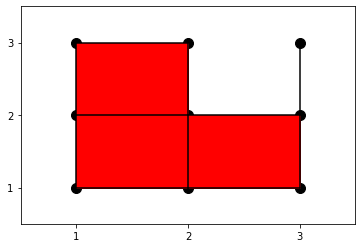

(1.0, ('h', 3, 1))
Results:
         -1: 0
          1: 0


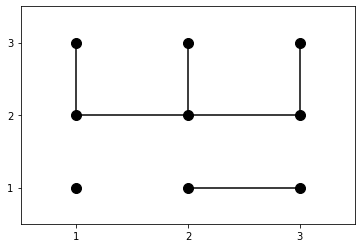

(0.0, ('h', 3, 2))
Results:
         -1: 0
          1: 0


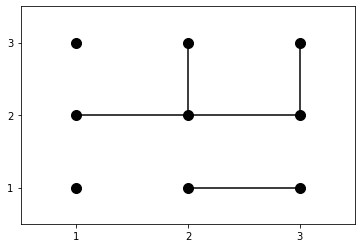

(0.1111111111111111, ('h', 4, 2))
Results:
         -1: 3
          1: 3


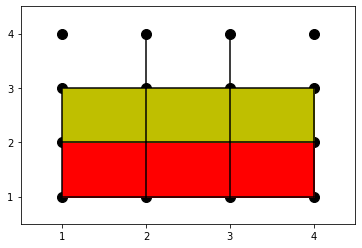

(0.1111111111111111, ('h', 1, 2))
Results:
         -1: 3
          1: 3


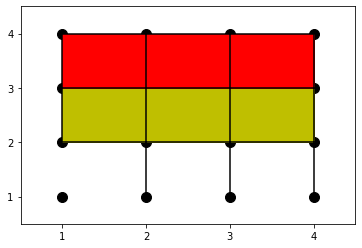

In [612]:
# --------------- Board 1 ---------------
heuristic_test_board_1 = {
    'n': 3,  ### hoizontal dots
    'm': 3,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}

draw_line(heuristic_test_board_1, "v", 1, 1,1)
draw_line(heuristic_test_board_1, "v", 1, 2,1)
draw_line(heuristic_test_board_1, "v", 1, 3,1)
draw_line(heuristic_test_board_1, "v", 2, 1,1)
draw_line(heuristic_test_board_1, "v", 2, 2,1)
draw_line(heuristic_test_board_1, "v", 2, 3,1)

draw_line(heuristic_test_board_1, "h", 1, 1,1)
draw_line(heuristic_test_board_1, "h", 1, 2,1)
draw_line(heuristic_test_board_1, "h", 2, 1,1)
draw_line(heuristic_test_board_1, "h", 2, 2,1)
draw_line(heuristic_test_board_1, "h", 3, 1,1)

print(heuristic_search(heuristic_test_board_1, 1, 10))
print_board(heuristic_test_board_1)

# --------------- Board 2 ---------------
heuristic_test_board_2 = {
    'n': 3,  ### hoizontal dots
    'm': 3,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}
draw_line(heuristic_test_board_2, "v", 2, 1,1)
draw_line(heuristic_test_board_2, "v", 2, 2,1)
draw_line(heuristic_test_board_2, "v", 2, 3,1)

draw_line(heuristic_test_board_2, "h", 1, 2,1)
draw_line(heuristic_test_board_2, "h", 2, 1,1)
draw_line(heuristic_test_board_2, "h", 2, 2,1)

print(heuristic_search(heuristic_test_board_2, 1, 10))
print_board(heuristic_test_board_2)

# --------------- Board 3 ---------------
heuristic_test_board_3 = {
    'n': 3,  ### hoizontal dots
    'm': 3,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}

draw_line(heuristic_test_board_3, "v", 2, 2,1)
draw_line(heuristic_test_board_3, "v", 2, 3,1)

draw_line(heuristic_test_board_3, "h", 1, 2,1)
draw_line(heuristic_test_board_3, "h", 2, 1,1)
draw_line(heuristic_test_board_3, "h", 2, 2,1)

print(heuristic_search(heuristic_test_board_3, 1, 10))
print_board(heuristic_test_board_3)

# --------------- Board 4 ---------------
heuristic_test_board_4 = {
    'n': 4,  ### hoizontal dots
    'm': 4,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}

draw_line(heuristic_test_board_4, "v", 1, 1,1)
draw_line(heuristic_test_board_4, "v", 1, 2,1)
draw_line(heuristic_test_board_4, "v", 1, 3,1)
draw_line(heuristic_test_board_4, "v", 1, 4,1)
draw_line(heuristic_test_board_4, "v", 2, 1,1)
draw_line(heuristic_test_board_4, "v", 2, 2,1)
draw_line(heuristic_test_board_4, "v", 2, 3,1)
draw_line(heuristic_test_board_4, "v", 2, 4,1)
draw_line(heuristic_test_board_4, "v", 3, 2,1)
draw_line(heuristic_test_board_4, "v", 3, 3,1)

draw_line(heuristic_test_board_4, "h", 1, 1,1)
draw_line(heuristic_test_board_4, "h", 1, 2,1)
draw_line(heuristic_test_board_4, "h", 1, 3,1)
draw_line(heuristic_test_board_4, "h", 2, 1,1)
draw_line(heuristic_test_board_4, "h", 2, 2,1)
draw_line(heuristic_test_board_4, "h", 2, 3,1)
draw_line(heuristic_test_board_4, "h", 3, 1,-1)
draw_line(heuristic_test_board_4, "h", 3, 2,-1)
draw_line(heuristic_test_board_4, "h", 3, 3,-1)


print(heuristic_search(heuristic_test_board_4, 1, 10))
print_board(heuristic_test_board_4)


# --------------- Board 5 ---------------
heuristic_test_board_5 = {
    'n': 4,  ### hoizontal dots
    'm': 4,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}

draw_line(heuristic_test_board_5, "v", 1, 2,1)
draw_line(heuristic_test_board_5, "v", 1, 3,1)
draw_line(heuristic_test_board_5, "v", 1, 4,1)
draw_line(heuristic_test_board_5, "v", 2, 1,1)
draw_line(heuristic_test_board_5, "v", 2, 2,1)
draw_line(heuristic_test_board_5, "v", 2, 3,1)
draw_line(heuristic_test_board_5, "v", 2, 4,1)
draw_line(heuristic_test_board_5, "v", 3, 1,1)
draw_line(heuristic_test_board_5, "v", 3, 2,1)
draw_line(heuristic_test_board_5, "v", 3, 3,1)
draw_line(heuristic_test_board_5, "v", 3, 4,1)

draw_line(heuristic_test_board_5, "h", 2, 1,1)
draw_line(heuristic_test_board_5, "h", 2, 2,1)
draw_line(heuristic_test_board_5, "h", 2, 3,1)
draw_line(heuristic_test_board_5, "h", 3, 1,-1)
draw_line(heuristic_test_board_5, "h", 3, 2,-1)
draw_line(heuristic_test_board_5, "h", 3, 3,-1)
draw_line(heuristic_test_board_5, "h", 4, 1,1)
draw_line(heuristic_test_board_5, "h", 4, 2,1)
draw_line(heuristic_test_board_5, "h", 4, 3,1)


print(heuristic_search(heuristic_test_board_5, 1, 10))
print_board(heuristic_test_board_5)

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [617]:
# --------------- Board 4x4 (dots) ---------------
cuttoff_test_board_4x4 = {
    'n': 4,  ### hoizontal dots
    'm': 4,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}

# --------------- Board 5x5 (dots) ---------------
cuttoff_test_board_5x5 = {
    'n': 5,  ### hoizontal dots
    'm': 5,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}

# --------------- Board 6x6 (dots) ---------------
cuttoff_test_board_6x6 = {
    'n': 6,  ### hoizontal dots
    'm': 6,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}

# --------------- Board 7x7 (dots) ---------------
cuttoff_test_board_7x7 = {
    'n': 7,  ### hoizontal dots
    'm': 7,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}

# --------------- Board 8x8 (dots) ---------------
cuttoff_test_board_8x8 = {
    'n': 8,  ### hoizontal dots
    'm': 8,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}

start_time = timeit.default_timer()
heuristic_search(cuttoff_test_board_4x4, 1, 4)
end_time = timeit.default_timer()
print(f"Empty board with size 4x4 took: {(end_time-start_time)/10 * 1e3} milliseconds")

start_time = timeit.default_timer()
heuristic_search(cuttoff_test_board_5x5, 1, 4)
end_time = timeit.default_timer()
print(f"Empty board with size 5x5 took: {(end_time-start_time)/10 * 1e3} milliseconds")

start_time = timeit.default_timer()
heuristic_search(cuttoff_test_board_6x6, 1, 4)
end_time = timeit.default_timer()
print(f"Empty board with size 6x6 took: {(end_time-start_time)/10 * 1e3} milliseconds")

start_time = timeit.default_timer()
heuristic_search(cuttoff_test_board_7x7, 1, 4)
end_time = timeit.default_timer()
print(f"Empty board with size 7x7 took: {(end_time-start_time)/10 * 1e3} milliseconds")

start_time = timeit.default_timer()
heuristic_search(cuttoff_test_board_8x8, 1, 4)
end_time = timeit.default_timer()
print(f"Empty board with size 8x8 took: {(end_time-start_time)/10 * 1e3} milliseconds")

Empty board with size 4x4 took: 4.282189998775721 milliseconds
Empty board with size 5x5 took: 15.90403000009246 milliseconds
Empty board with size 6x6 took: 67.9060299997218 milliseconds
Empty board with size 7x7 took: 159.41111000138335 milliseconds
Empty board with size 8x8 took: 299.6157800022047 milliseconds


### Playtime

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [619]:
# --------------- Minimax VS. Random ---------------
depth_2_vs_depth_6 = {
    'n': 4,  ### hoizontal dots
    'm': 4,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}
def heuristic_player_depth_2(board, player = None):
    v, a = heuristic_search(board, player, 2, False)
    drawn, another_turn = draw_line(board, a[0], a[1], a[2], player)
    return another_turn

def heuristic_player_depth_6(board, player = None):
    v, a = heuristic_search(board, player, 6, False)
    drawn, another_turn = draw_line(board, a[0], a[1], a[2], player)
    return another_turn

def minimax_environment(board, verbose = False):
    player1_total = 0
    player2_total = 0

    for x in range(10):
        temp_board = board.copy()
        player = 1
        while terminal(temp_board) is False:
            if player == 1:
                if not heuristic_player_depth_6(temp_board, player):
                    player = -1
            else:
                if not heuristic_player_depth_2(temp_board, player):
                    player = 1
            if verbose: print_board(temp_board)

        if winner(temp_board) == 1:
            player1_total += 1
        elif winner(temp_board) == -1:
            player2_total += 1

    if player1_total > player2_total:
        print(f"Player 1 Wins!")
    elif player2_total > player1_total:
        print(f"Player 2 Wins!")
    else:
        print(f"Player 1 and Player 2 Tied!")
    print(f"Player 1: {player1_total} Player 2: {player2_total}")


minimax_environment(depth_2_vs_depth_6, False)

Player 1 Wins!
Player 1: 10 Player 2: 0


## Tournament task [+1 to 5% bonus on your course grade; will be assigned separately]

Find another student and let your best agent play against the other student's best player. You are allowed to use any improvements you like as long as you code it yourself. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.


## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search (see [tic-tac-toe-example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_pure_monte_carlo_search.ipynb)) and investigate how this search performs on the test boards that you have used above. 

In [513]:
# Your code/ answer goes here.

### Best First Move

How would you determine what the best first move for a standard board ($5 \times 5$) is? You can use Pure Monte Carlo Search or any algorithms that you have implemented above.

In [514]:
# Your code/ answer goes here.